# Exercise2:  Regression analysis using crime dataset
    

In this exercise you need to perform multivariate regression analysis of Communities and Crime dataset for regression
https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
We use edited version of the dataset, where only the most relevant features are kept.
Your notebooks must contain not only code cells but also text cells with your analysis and comments.
Try to perform following tasks:

- Load crime dataset (CommViolPredUnnormalizedData_edited.csv)

- Visualize data, comment on what you observe. Does this data need preprocessing?

- Define your predicted values y_crime ('ViolentCrimesPerPop') and feature values X_crime (the rest of the columns)

- Split the data into train and test set

- Decide on type of regression to use

- Perform regression analysis using sklearn without normalization and with normalization. Compare.

- Perform regression without  regularization and with Ridge regularization. Compare.

- Check how model performance depends on alpha parameter of Ridge regularization.

Importing the needed libraries

In [409]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# To plot pretty figures
COLOR = 'black'
plt.rcParams.update({
    "text.color": "black",
    "axes.labelcolor": COLOR,
    "xtick.color": COLOR,
    "ytick.color": COLOR,
    "figure.facecolor": "lightgray",
    "figure.edgecolor": "black"})
mpl.rcParams['text.color'] = mpl.rcParams['axes.labelcolor'] = mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = COLOR
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Loading dataset 
Load crime dataset

In [346]:
dataset = pd.read_csv('CommViolPredUnnormalizedData_edited.csv')

## Visualize data
Comment on what you observe. Does this data need preprocessing?

In [347]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population             1994 non-null   int64  
 1   householdsize          1994 non-null   float64
 2   agePct12t21            1994 non-null   float64
 3   agePct12t29            1994 non-null   float64
 4   agePct16t24            1994 non-null   float64
 5   agePct65up             1994 non-null   float64
 6   numbUrban              1994 non-null   int64  
 7   pctUrban               1994 non-null   float64
 8   medIncome              1994 non-null   int64  
 9   pctWWage               1994 non-null   float64
 10  pctWFarmSelf           1994 non-null   float64
 11  pctWInvInc             1994 non-null   float64
 12  pctWSocSec             1994 non-null   float64
 13  pctWPubAsst            1994 non-null   float64
 14  pctWRetire             1994 non-null   float64
 15  medF

In [348]:
dataset.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'Pe

The dataset is complete, there are no missing values. <br>
But the dataset is very large, it contains 84 columns. <br>
For this we need preprocess the dataset and select the relevant columns out of the dataset, <br>
in order to be able to visualize the dataset correctlly. <br>

We select the columns based on the highest correlations ratio with the 'ViolentCrimesPerPopulation' (total number of violent crimes per 100K popuation).

In [349]:
dataset_correlations = dataset.corr()
dataset_correlations.ViolentCrimesPerPop.sort_values(ascending=False).head(15)

ViolentCrimesPerPop    1.000000
PctKidsBornNeverMar    0.738089
pctWPubAsst            0.563107
FemalePctDiv           0.537303
TotalPctDiv            0.536549
MalePctDivorce         0.510456
PctPopUnderPov         0.505349
PctUnemployed          0.483441
PctVacantBoarded       0.479910
PctHousNoPhone         0.473718
PctNotHSGrad           0.467596
PctHousLess3BR         0.454470
PctPersDenseHous       0.395856
PctLess9thGrade        0.371422
PctLargHouseFam        0.341601
Name: ViolentCrimesPerPop, dtype: float64

In [350]:
def filter_relevant_df(df, on_attribute:str, length:int, print_corr=False):
    relevant_correlations = dataset_correlations["ViolentCrimesPerPop"].sort_values(ascending=False, key=abs)[:length]
    if print_corr: print(relevant_correlations)
    return df[relevant_correlations.index]

relevant_dataset = filter_relevant_df(dataset.copy(), 'ViolentCrimesPerPop', 14, print_corr=True)
relevant_dataset

ViolentCrimesPerPop    1.000000
PctKidsBornNeverMar    0.738089
PctKids2Par           -0.728059
PctFam2Par            -0.698641
PctYoungKids2Par      -0.658436
PctTeen2Par           -0.655628
pctWPubAsst            0.563107
pctWInvInc            -0.557787
FemalePctDiv           0.537303
TotalPctDiv            0.536549
MalePctDivorce         0.510456
PctPersOwnOccup       -0.507330
PctPopUnderPov         0.505349
PctUnemployed          0.483441
Name: ViolentCrimesPerPop, dtype: float64


,ViolentCrimesPerPop,PctKidsBornNeverMar,PctKids2Par,PctFam2Par,PctYoungKids2Par,PctTeen2Par,pctWPubAsst,pctWInvInc,FemalePctDiv,TotalPctDiv,MalePctDivorce,PctPersOwnOccup,PctPopUnderPov,PctUnemployed
0,41.02,0.36,90.17,91.43,95.78,95.81,1.03,70.20,5.22,4.47,3.67,91.46,1.96,2.70
1,127.56,0.24,85.33,86.91,96.82,86.46,2.75,64.11,6.45,5.42,4.23,89.03,3.98,2.43
2,218.59,0.88,78.85,78.54,92.37,75.72,2.94,55.73,14.76,12.55,10.10,64.18,4.75,4.01
3,306.64,3.84,62.36,64.02,65.38,67.43,11.71,38.95,14.47,12.91,10.98,58.18,17.23,9.86
4,442.95,1.58,69.79,71.94,79.76,75.33,7.12,41.15,14.46,13.04,11.40,57.81,17.78,5.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,545.75,4.49,64.81,67.04,76.19,72.78,19.98,31.42,16.28,13.34,10.22,41.69,25.06,9.99
1990,124.10,2.98,63.66,68.57,80.29,73.68,8.85,33.25,16.12,13.77,10.86,56.06,20.79,7.90
1991,353.83,1.60,74.20,76.77,76.92,82.42,9.01,44.72,12.38,11.23,9.89,74.61,7.56,5.18
1992,691.17,2.35,63.45,67.76,87.82,74.12,13.05,21.94,14.36,12.48,10.35,60.11,30.32,12.12


Dropping equivalent columns 

In [351]:
try:
    relevant_dataset.drop(['FemalePctDiv', 'MalePctDivorce', 'PctFam2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'pctWInvInc'], axis=1, inplace=True)
    print("drop undesired columns")
except:
    print("undo columns dropping")
    relevant_dataset = filter_relevant_df(dataset.copy(), 'ViolentCrimesPerPop', 15)

drop undesired columns


The relevant attributes are:
* PctKidsBornNeverMar: percentage of kids born to never married
* PctKids2Par: percentage of kids in family housing with two parents
* pctWPubAsst: percentage of households with public assistance income in 1989
* TotalPctDiv: percentage of population who are divorced
* PctPersOwnOccup: percent of people in owner occupied households
* PctPopUnderPov: percentage of people under the poverty level
* PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed
* PctVacantBoarded: percent of vacant housing that is boarded up
* PctHousNoPhone: percent of occupied housing units without phone

We can conclude that the relevant attributes mostly describe an economic situation.

In [352]:
relevant_dataset.columns

Index(['ViolentCrimesPerPop', 'PctKidsBornNeverMar', 'PctKids2Par',
       'pctWPubAsst', 'TotalPctDiv', 'PctPersOwnOccup', 'PctPopUnderPov',
       'PctUnemployed'],
      dtype='object')

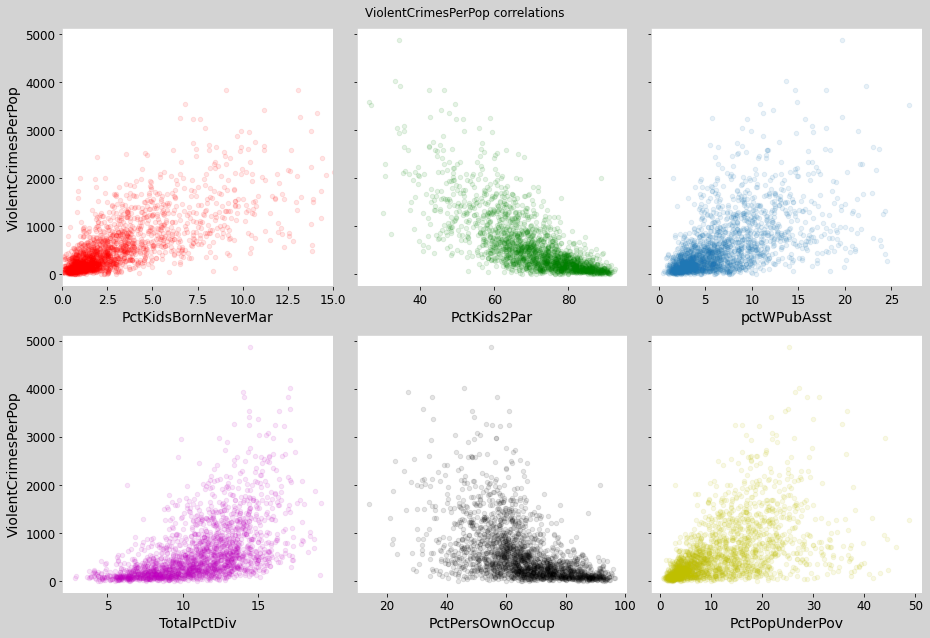

In [353]:
fig, ax = plt.subplots(2, 3, figsize=(13,9), sharey=True)
dataset.plot(kind="scatter", x="PctKidsBornNeverMar", y="ViolentCrimesPerPop", xlim=[0,15], alpha=0.1, color='r', ax=ax[0,0])
dataset.plot(kind="scatter", x="PctKids2Par", y="ViolentCrimesPerPop", alpha=0.1, color='g', ax=ax[0,1])
dataset.plot(kind="scatter", x="pctWPubAsst", y="ViolentCrimesPerPop", alpha=0.1, ax=ax[0,2])
dataset.plot(kind="scatter", x="TotalPctDiv", y="ViolentCrimesPerPop", alpha=0.1, color='m', ax=ax[1,0])
dataset.plot(kind="scatter", x="PctPersOwnOccup", y="ViolentCrimesPerPop",  alpha=0.1, color='k', ax=ax[1,1])
dataset.plot(kind="scatter", x="PctPopUnderPov", y="ViolentCrimesPerPop", color='y', alpha=0.1, ax=ax[1,2])

plt.suptitle('ViolentCrimesPerPop correlations')
plt.tight_layout()

---

## Axes Definition
Define your predicted values y_crime ('ViolentCrimesPerPop') and feature values X_crime (the rest of the columns)


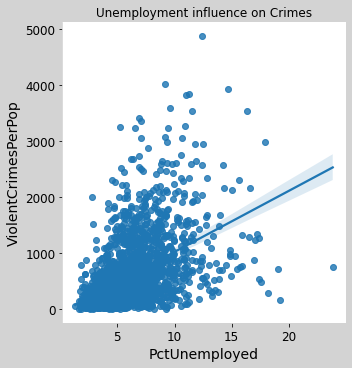

In [442]:
feature = 'PctUnemployed'
y_crime = dataset['ViolentCrimesPerPop']
X_crime_all = dataset[relevant_dataset.columns[1:]]
X_crime = dataset[feature]

sns.lmplot(x=X_crime.name, y=y_crime.name, data=dataset); 
plt.ylabel(y_crime.name)
plt.xlabel(X_crime.name)
plt.title('Unemployment influence on Crimes')
plt.scatter(X_crime, y_crime, alpha=0.1)

---

## Data-split 
Split the data into train and test set

In [383]:
X = [[value] for value in X_crime]
X_train, X_test, y_train, y_test = train_test_split(X, [*y_crime], random_state = 42)

---

## Regression analysis
Decide on type of regression to use

In case of such a complex plot, a linear regression will demonstrate the trend of the graphic. 

In [440]:
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score (training): {}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [115.58287591]
linear model intercept (b): -100.09016635324872
R-squared score (training): 0.2516557501123101
R-squared score (test): 0.1630561657040318


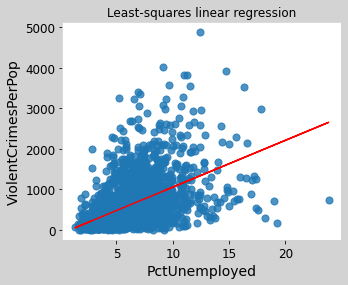

In [439]:
def plot_lin_regr(linreg, x,y):
    plt.figure(figsize=(5,4))
    plt.scatter(x, y, marker= 'o', s=50, alpha=0.8)
    plt.plot(x, linreg.coef_ * x + linreg.intercept_, 'r-')
    plt.title('Least-squares linear regression')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()

plot_lin_regr(linreg, X_crime, y_crime)

The plot demonstrate a linear upward trend. (with the percentage of unemployment)

---

## Regression analysis 2
Perform regression analysis using sklearn without normalization and with normalization. Compare.

AttributeError: 'MinMaxScaler' object has no attribute 'iloc'

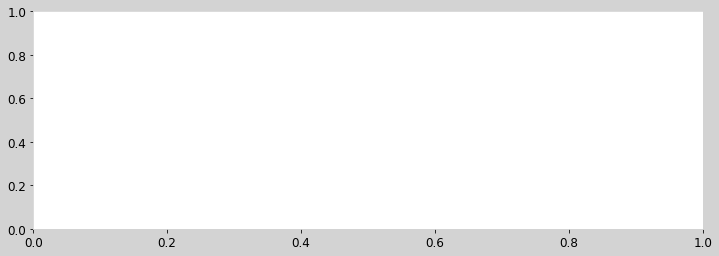

In [458]:
#standard scaling
# dataset_scaled = dataset[[X_crime.name,y_crime.name]]
# scaler = StandardScaler()
# scaler.fit(dataset_scaled)
# dataset_scaled = pd.DataFrame(scaler.transform(dataset_scaled), columns=dataset_scaled.columns, index=dataset_scaled.index)
# dataset_scaled.head()

# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_crime_all_scaled = scaler.fit(X_crime_all)

fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(X_crime_all_scaled.iloc[:,0], y_crime)
ax.scatter(X_crime_all_scaled.iloc[:,1], y_crime)

# linreg2 = LinearRegression().fit(X_train, y_train)

# plot_lin_regr(linreg2, dataset_scaled.iloc[:,0], dataset_scaled.iloc[:,1])


In [459]:
X_crime_all_scaled

MinMaxScaler()

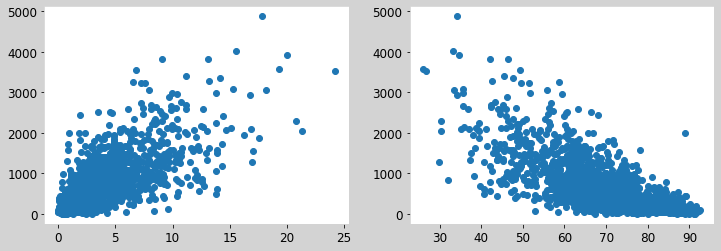

In [450]:
X_crime_all
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].scatter(X_crime_all.iloc[:,0], y_crime)
ax[1].scatter(X_crime_all.iloc[:,1], y_crime)

---

## Regression analysis 3
Perform regression without  regularization and with Ridge regularization. Compare.

In [415]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y_crime)

ridge_reg.predict([[5]])

array([477.43191753])

---

## Model performance
Check how model performance depends on alpha parameter of Ridge regularization.